# PA 1: Exploratory Analysis over Covid19 Dataset

## Assignment Details

In this assignment, you will conduct a guided exploration over covid 19 dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on Covid 19 dataset. Specifically, you will work on covid.csv attached file with this project. The file covid.csv contains 35,156 rows and 10 columns. This dataset begins 01/22/2020, and runs upto 7/27/2020. It includes day to day country wise no. of cases which has County/State/Province level data. The columns of the data-set are:

- Date - The day on which cases have been reported / recorded.
- Country/Region - The country where these cases have been recorded.
- Confirmed	Deaths - The no. of deaths
- Recovered	- The no. of recovered cases.
- Active - The no. of active cases.
- New cases	- The no. of new cases.
- New deaths - The no. of new deaths.	
- New recovered - The no. of new recovered cases.
- WHO Region - WHO operated regions.


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [50]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [51]:
#2.5 points for both questions below.
df_data=pd.read_csv('covid.csv')
df_data['Date']= pd.to_datetime(df_data['Date'])

#read the csv file into a Pandas data frame
print (">>Task a: The csv file into a Pandas data frame: \n", df_data.head(n=5))

#return the last 5 rows of the dataset
print (">>Task b: The last 5 rows of the dataset are: \n",df_data.tail(n=5) )

>>Task a: The csv file into a Pandas data frame: 
         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0 2020-01-22    Afghanistan          0       0          0       0          0   
1 2020-01-22        Albania          0       0          0       0          0   
2 2020-01-22        Algeria          0       0          0       0          0   
3 2020-01-22        Andorra          0       0          0       0          0   
4 2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa  
>>Task b: The last 5 rows of the dataset are: 
             Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
35151 2020-07-27  

# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.
For each task below, look for a Pandas function to do the task.
Replace None in each task with your code.

In [52]:
# 2.5 points
#Task 1-a: Print the details of the data frame (information such as number of rows,columns, name of columns, etc)
df_info=df_data.info(verbose=True)
print (">>Task 1-a: Details of data frame are: \n",df_data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  

In [53]:
#2.5 points
#Task 1-b: Find the number of rows and columns in the data frame.
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print ("\n\n>>Task 1-b: Number of rows: %s and number of columns:%s \n" % (num_rows, num_cols)) 



>>Task 1-b: Number of rows: 35156 and number of columns:10 



In [54]:
#7.5 points
#Task 1-c: Print the total cases confirmed, deaths, and recovered cases of each country with the given dataset.
#The below variable holds data for all the unique countries, and their total - confirmed, deaths, and recovered cases.
#total_confirmed_deaths_recovered = df_data[['Country/Region','Confirmed','Deaths','Recovered']]
total_confirmed_deaths_recovered = df_data.sort_values(by=['Confirmed'],ascending=False).drop_duplicates('Country/Region')[['Country/Region','Confirmed','Deaths','Recovered']]
print ("\n\n>>Task 1-c: Total cases confirmed, deaths, and recovered are \n", total_confirmed_deaths_recovered)



>>Task 1-c: Total cases confirmed, deaths, and recovered are 
               Country/Region  Confirmed  Deaths  Recovered
35142                     US    4290259  148011    1325804
34992                 Brazil    2442375   87618    1846641
35048                  India    1480073   33408     951166
35107                 Russia     816680   13334     602249
35123           South Africa     452529    7067     274925
...                      ...        ...     ...        ...
24920               Dominica         18       0         16
32117  Saint Kitts and Nevis         17       0         15
35037              Greenland         14       0         13
29621               Holy See         12       0         12
28794         Western Sahara         10       1          8

[187 rows x 4 columns]


In [69]:
# 5 points for both questions below,

#Task 1-d-i: Print top 10 worst affected countries with confirmed cases.
top_confirmed_ten_countries  = df_data.sort_values(by=['Confirmed'],ascending=False).drop_duplicates('Country/Region').head(10)[['Country/Region']]
#top_confirmed_ten_countries

print ("\n\n >>Task 1-d: \n", top_confirmed_ten_countries.head(n=10))

#Task 1-d-ii: Print top 5 worst affected countries with death cases.
top_death_five_countries  = df_data.sort_values(by=['Deaths'],ascending=False).drop_duplicates('Country/Region').head(5)[['Country/Region']]
print ("\n\n >>Task 1-d: \n", top_death_five_countries)



 >>Task 1-d: 
        Country/Region
35142              US
34992          Brazil
35048           India
35107          Russia
35123    South Africa
35080          Mexico
35101            Peru
35004           Chile
35146  United Kingdom
35050            Iran


 >>Task 1-d: 
        Country/Region
35142              US
34992          Brazil
35146  United Kingdom
35080          Mexico
35054           Italy


# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [70]:
# 8 points
#Task 2-a: Find out the countries that has had more than a total of 2 hundred thousand confirmed cases.
confirmed_greater_than_200K = df_data.sort_values(by=['Date'],ascending=False).drop_duplicates('Country/Region')
confirmed_greater_than_200K=confirmed_greater_than_200K[confirmed_greater_than_200K.Confirmed>200000]
print (">>Task 2-a:  The countries that has had more than a total of 2 hundred thousand confirmed cases are: \n%s" % (confirmed_greater_than_200K))

# 8 points
#Task 2-b: Find out the total number of confirmed, recovered, and death cases for each WHO region.
#total_cases_whoregion = df_data.sort_values(by=['Date'],ascending=False).drop_duplicates('Country/Region').groupby('WHO Region')['Confirmed','Recovered','Deaths'].sum()

total_cases_whoregion = df_data.sort_values(by=['Date'],ascending=False).drop_duplicates('Country/Region').groupby('WHO Region').sum().loc[:,['Confirmed','Recovered','Deaths']]
print ("\n\n>>Task 2-b: The total number of confirmed, recovered, and death cases for each WHO region are: \n%s" % (total_cases_whoregion))


# 7 points
#Task 2-c: Find out the top 5 poorly performing countries, in the order of confirmed, deaths, and recovered cases.
top5_poorlyperforming=df_data.sort_values(by=['Date'],ascending=False).drop_duplicates('Country/Region')
top5_poorlyperforming=top5_poorlyperforming.sort_values(by=['Confirmed','Deaths','Recovered'],ascending=False).head(5)
print ("\n\n>>Task 2-c: The top 5 poorly performing countries, in the order of confirmed, deaths, and recovered cases.s are: \n%s" % (top5_poorlyperforming))

# 7 points
#Task 2-d: Find out the top 5 poorly performing WHO regions, in the order of confirmed, deaths, and recovered cases.
#top5_disasters=df_data.sort_values(by=['Date'],ascending=False).drop_duplicates('Country/Region').groupby('WHO Region')['Confirmed','Recovered','Deaths'].sum()
top5_disasters=df_data.sort_values(by=['Date'],ascending=False).drop_duplicates('Country/Region').groupby('WHO Region').sum().loc[:,['Confirmed','Deaths','Recovered']]
top5_disasters=top5_disasters.sort_values(by=['Confirmed','Deaths','Recovered'],ascending=False).head(5)

print ("\n\n>>Task 2-d: The top 5 poorly performing WHO regions, in the order of confirmed, deaths, and recovered cases are: \n%s" % (top5_disasters ))




>>Task 2-a:  The countries that has had more than a total of 2 hundred thousand confirmed cases are: 
            Date  Country/Region  Confirmed  Deaths  Recovered   Active  \
35034 2020-07-27         Germany     207112    9125     190314     7673   
35030 2020-07-27          France     220352   30212      81212   108928   
35054 2020-07-27           Italy     246286   35112     198593    12581   
35050 2020-07-27            Iran     293606   15912     255144    22550   
35048 2020-07-27           India    1480073   33408     951166   495499   
34982 2020-07-27      Bangladesh     226225    2965     125683    97577   
34992 2020-07-27          Brazil    2442375   87618    1846641   508116   
35006 2020-07-27        Colombia     257101    8777     131161   117163   
35004 2020-07-27           Chile     347923    9187     319954    18782   
35126 2020-07-27           Spain     272421   28432     150376    93613   
35123 2020-07-27    South Africa     452529    7067     274925   170537  

# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

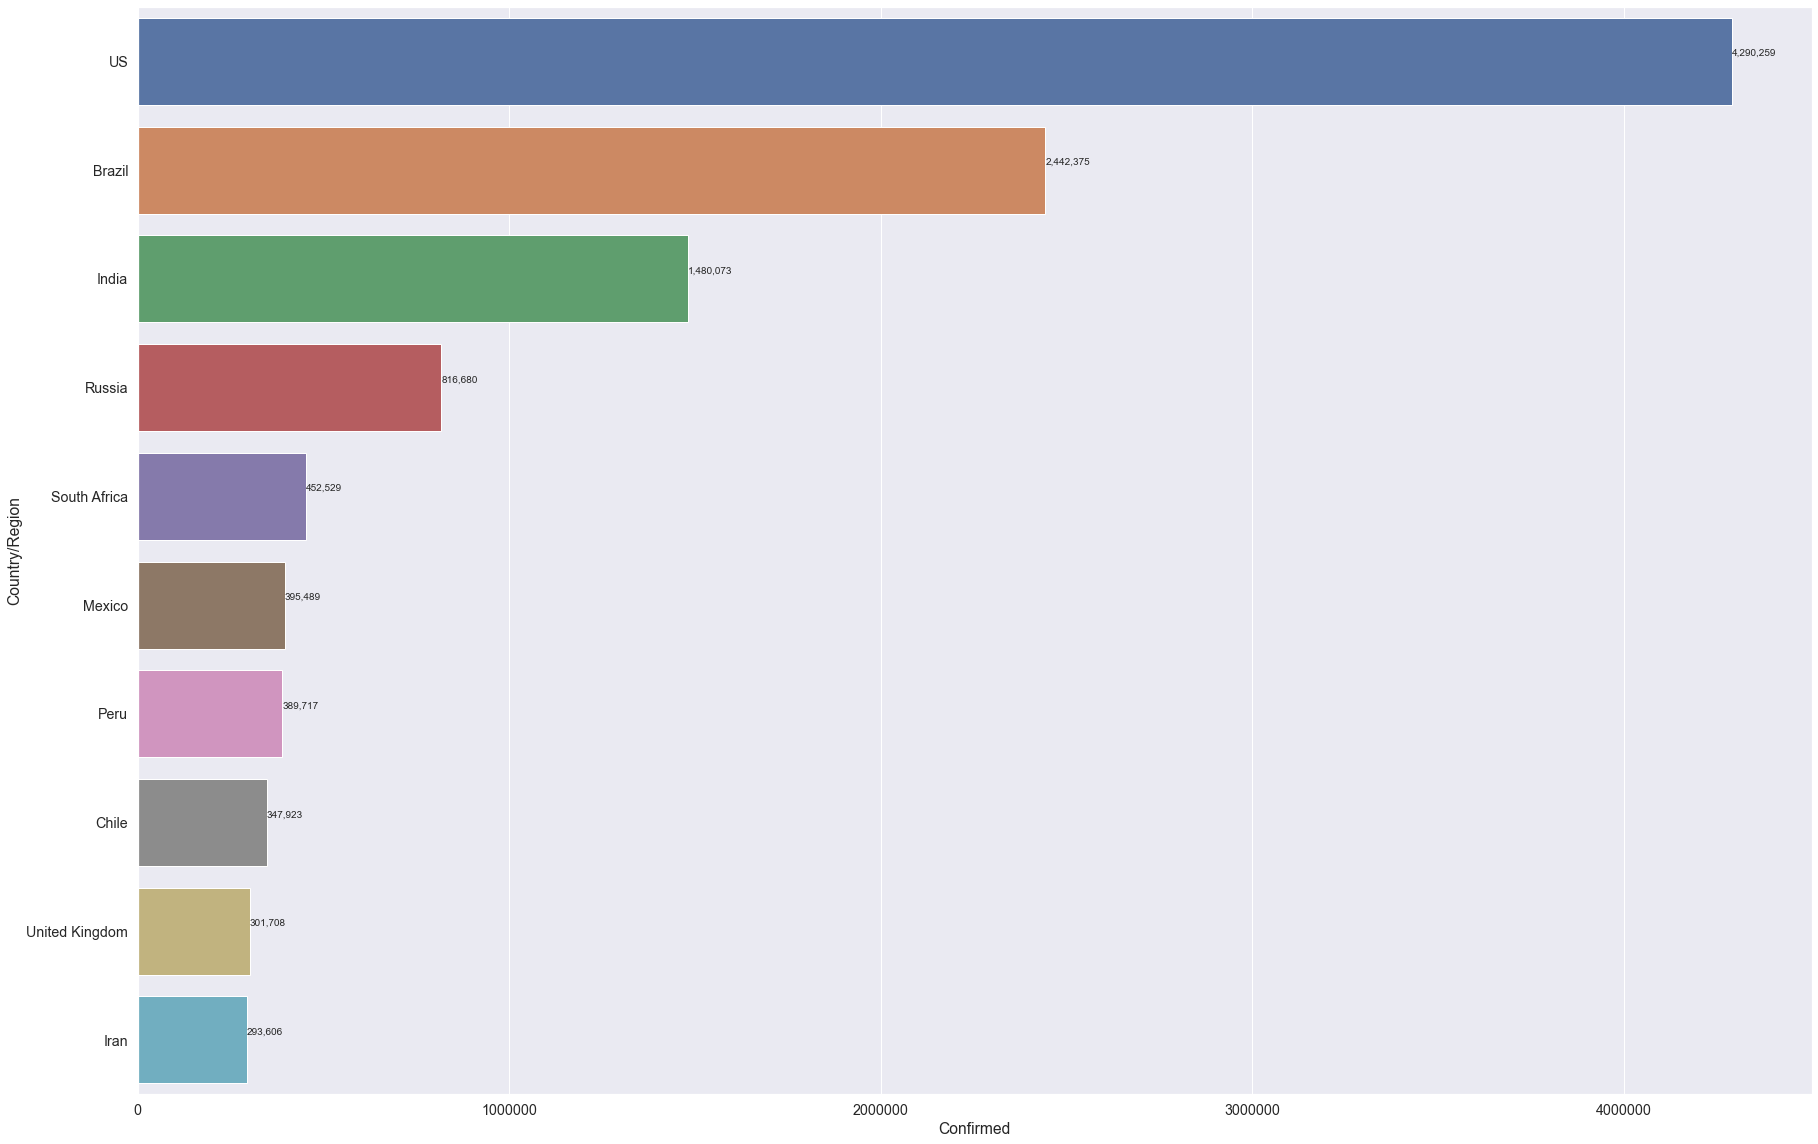

WHO Region
Americas           8839286
Europe             3299523
South-East Asia    1835297
Name: Confirmed, dtype: int64


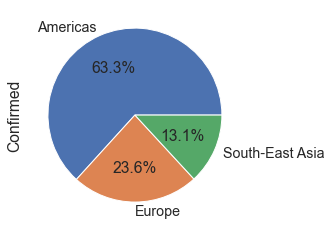

In [57]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 15 points
# Task 3-a: Plot the graph for the top 10 poorly performing countries, over 7 months of data provided 
# Think of a way to nicely visualize all the countries. 
#########################begin code for Task 3-a
top_10=df_data.sort_values(by=['Date'],ascending=False).drop_duplicates('Country/Region')
top_10=top_10.sort_values(by=['Confirmed','Deaths','Recovered'],ascending=False).head(10)
plt.figure(figsize=(30,20))
plt.ticklabel_format(style='plain', axis='x')
plot = sns.barplot(top_10['Confirmed'], top_10['Country/Region'])
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country/Region'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()




#########################end code for Task 3-a

# 15 points
# Task 3-b: Plot a pie-chart for the top 3 poorly performing WHO regions, over 7 months of data provided 
#########################begin code for Task 3-b 
top_3=df_data.sort_values(by=['Date'],ascending=False).drop_duplicates('Country/Region')
top_3=top_3.sort_values(by=['Confirmed','Deaths','Recovered'],ascending=False)
top_3 = top_3.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending=False).head(3)
print(top_3)

top_3.plot.pie(autopct="%.1f%%");



#########################end code for Task 3-b

# Task 4: Interesting Information.
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 10 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

Text(0, 0.5, 'Confirmed Cases')

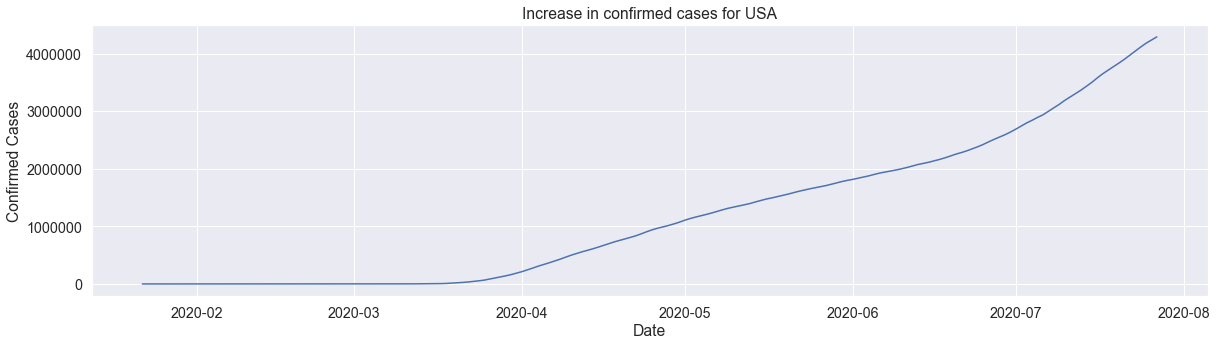

In [68]:
#########################begin code for Task 4
temp = df_data[(df_data['Country/Region']=='US')]
plt.figure(figsize=(20,5))
ax = sns.lineplot(x="Date", y="Confirmed",data=temp)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Increase in confirmed cases for USA')
# Set x-axis label
plt.xlabel('Date')
# Set y-axis label
plt.ylabel('Confirmed Cases')

#########################end code for Task 4

In [59]:
confirmed_global=df_data
selected_countries = ['Germany', 'Italy', 'Spain', 'US', 'Korea, South']
selected_countries_data = confirmed_global[confirmed_global['Country/Region'].isin(selected_countries)]
